In [31]:
import sys

!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [33]:
WIDTH = 100
HEIGHT = 80
N = 5

innitial_map = np.zeros((HEIGHT, WIDTH))
reference_values = np.arange(1, N+1, 1) * 50
indices_h = [np.random.randint(0, HEIGHT) for _ in range(N)]
indices_w = [np.random.randint(0, WIDTH) for _ in range(N)]
indices = list(zip(indices_h, indices_w))
for c, index in enumerate(indices):
    innitial_map[index] = reference_values[c]




In [34]:
DIRECTIONS = [(0, -1), 
              (-1, 0), (1, 0),
               (0, 1)]

def remove_if_surrounded(point: tuple[int, int]) -> bool:
    for dx, dy in DIRECTIONS:
        newX = point[0] + dx
        newY = point[1] + dy
        if (0 <= newX < HEIGHT) and (0 <= newY < WIDTH) and innitial_map[newX, newY] == 0:
            return False
    return True

In [35]:
import random

def process_2d(explored: set[tuple[int, int]]):
    images = []
    point = random.choice(indices)
    while (np.any(innitial_map == 0)) and explored:
    #for _ in range(HEIGHT*WIDTH*2):
        choice = random.choice(DIRECTIONS)
        new = (point[0] + choice[0], point[1] + choice[1])
        if (0 <= new[0] < HEIGHT) and (0 <= new[1] < WIDTH) and innitial_map[new] == 0:
            innitial_map[new] = innitial_map[point]
            explored.add(new)
            images.append(innitial_map.copy())
            if (remove_if_surrounded(point)):
                explored.remove(point)
        point = random.choice(list(explored))
    return images
    
    


In [36]:
explored = set(indices)
images = process_2d(explored)

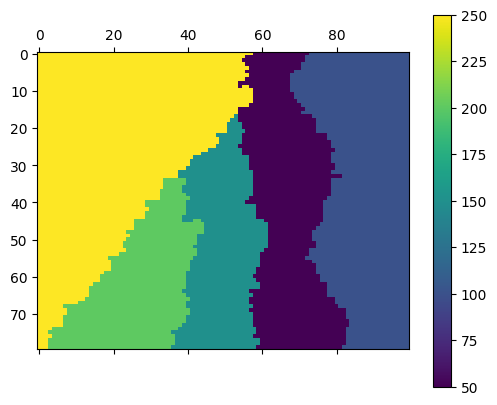

In [37]:
plt.matshow(innitial_map)
plt.colorbar()
plt.show()

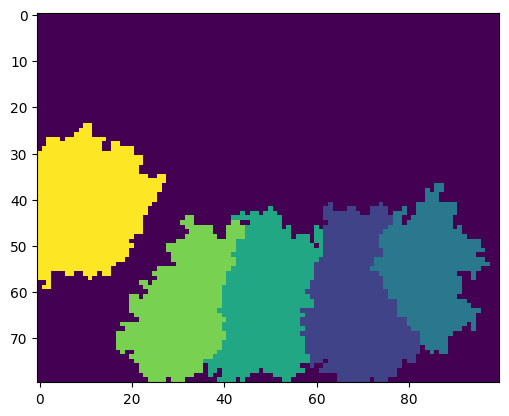

In [39]:
fig = plt.figure()
anim = animation.ArtistAnimation(fig, [[plt.imshow(layer, animated=True)] for layer in images[:3000]], interval=5)
anim.save('test.mp4')
plt.show()